In [33]:
from tools import load_conf, save_conf
from ipyleaflet import Map, basemaps, basemap_to_tiles
from ipywidgets import Layout
from ipyleaflet import Marker, Popup
from ipywidgets import HTML
from store_parser import get_city_stat
from ipywidgets import IntProgress, Text
from IPython.display import display, clear_output
import time
from il_supermarket_scarper.scrappers_factory import ScraperFactory


max_count = len(ScraperFactory.all_scrapers())
t = Text(value='Downloading Store Info', disabled=True)
progress_bar = IntProgress(min=0, max=max_count) # instantiate the bar
display(t, progress_bar)

city_stat = get_city_stat(progress_bar)
clear_output() #clear output after long downloading from store provider
city_location = load_conf('conf/city_location.json')

#defaultLayout=Layout(width='600px', height='700px')

center_israel = (31.783333, 35.216667)
m = Map(
    center=center_israel,
    zoom=8,
    close_popup_on_click=False,
    #layout=defaultLayout
    )

minimal_store_per_city = 15
city_count_location = {k:city_location[k]+[city_stat[k]] for k in city_stat if city_stat[k]>minimal_store_per_city and k in city_location}

for city_name in  city_count_location:
    message = HTML()
    arr = city_count_location[city_name]
    message.value = f'{city_name},{str(arr[2])} חנויות'
    marker = Marker(location=(arr[0],arr[1]))
    marker.popup = message
    m.add_layer(marker)

m

Map(center=[31.783333, 35.216667], close_popup_on_click=False, controls=(ZoomControl(options=['position', 'zoo…

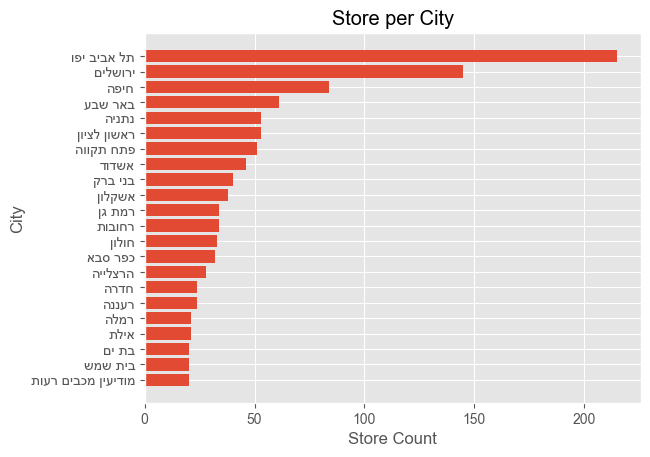

[Text(0.5, 1.0, 'Store per City')]

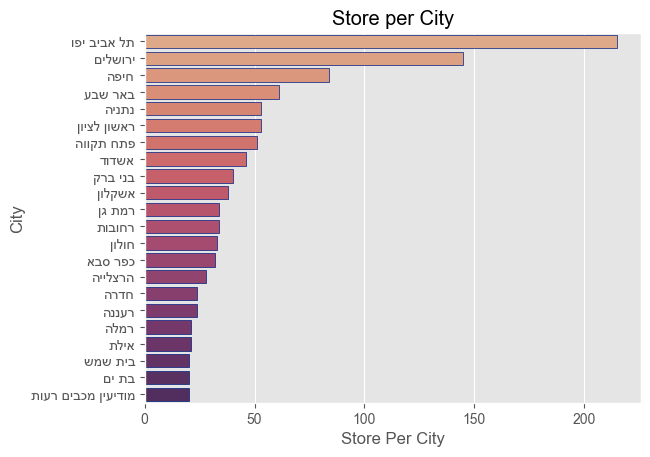

In [35]:
# importing matplotlib module
import matplotlib.pyplot as plt
import matplotlib
from bidi import algorithm as bidialg
from store_parser import get_city_stat
from il_supermarket_scarper.scrappers_factory import ScraperFactory
from ipywidgets import IntProgress, Text
from IPython.display import display, clear_output
import pandas as pd
import seaborn as sns

def download_data():
    max_count = len(ScraperFactory.all_scrapers())
    t = Text(value='Downloading Store Info', disabled=True)
    progress_bar = IntProgress(min=0, max=max_count) # instantiate the bar
    display(t, progress_bar)

    city_stat = get_city_stat(progress_bar)
    clear_output() #clear output after long downloading from store provider
    return city_stat    

def clean_data(city_stat, ):
    del city_stat['unknown']
    del city_stat['None']
    key_to_del = [key for key in city_stat if city_stat[key]<20]
    for key in key_to_del:
        del city_stat[key]
    city_stat_sorter = sorted(city_stat.items(), key=lambda x:x[1], reverse=False)
    return city_stat_sorter

def show_by_plotlib(city_stat_sorter):
    matplotlib.rc('font', family='Arial')
    plt.style.use('ggplot')
    plt.barh([bidialg.get_display(k) for (k,v) in city_stat_sorter], [v for (k,v) in city_stat_sorter])
    plt.title('Store per City')
    plt.ylabel('City')
    plt.xlabel('Store Count')
    plt.show()

city_stat = download_data()
city_stat_sorter = clean_data(city_stat)

df1 = pd.DataFrame(city_stat_sorter, columns=['City', 'Store Per City'])
#display(df1)

show_by_plotlib(city_stat_sorter)

df1['City'] = df1['City'].apply(lambda x: bidialg.get_display(x))
order = df1.sort_values('Store Per City',ascending = False).City
sns.barplot(df1, y="City", x='Store Per City' , color='blue', order=order, palette = "flare", edgecolor = 'b').set(title='Store per City')